**LOADING THE PREPROCESSED DATA**

In [609]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import tensorflow as tf

session_conf = tf.ConfigProto(
 intra_op_parallelism_threads=1, 
                        inter_op_parallelism_threads=1, 
                      )

In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [0]:
data=pd.read_csv('/content/gdrive/My Drive/donors/preprocessed_data.csv')
label=pd.read_csv('/content/gdrive/My Drive/donors/preprocessed_data.csv')['project_is_approved']

In [0]:
data=data.drop(['project_is_approved'],axis=1)

In [614]:
data.head()

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03
2,ca,mrs,grades_prek_2,10,literacy_language,literacy,having class 24 students comes diverse learner...,329.00
3,ga,mrs,grades_prek_2,2,appliedlearning,earlydevelopment,i recently read article giving students choice...,481.04
4,wa,mrs,grades_3_5,2,literacy_language,literacy,my students crave challenge eat obstacles brea...,17.74


In [0]:
train_x,test_x,y_train,y_test = train_test_split(data,label,test_size=0.33, random_state=42)
train_x_cv,test_x_cv,y_train_cv,y_test_cv = train_test_split(train_x,y_train,test_size=0.2, random_state=42)

In [616]:
print(train_x_cv.shape)
print(test_x.shape)
print(test_x_cv.shape)

(58556, 8)
(36052, 8)
(14640, 8)


In [0]:
from keras.preprocessing.text import Tokenizer
def tokenizer(column):
  t = Tokenizer(split=' ',filters='!"#$%&()*+,-./:;<=>?@[\\]^`{|}~\t\n')
  t.fit_on_texts(column)
  encoded_docs = t.texts_to_sequences(column)
  
  return (t,encoded_docs)

  
  

**EMBEDDING SCHOOL STATE**

In [0]:
encodings_state=tokenizer(train_x_cv.school_state)
encodings_state_test_cv=encodings_state[0].texts_to_sequences(test_x_cv.school_state)
encodings_state_test=encodings_state[0].texts_to_sequences(test_x.school_state)

In [619]:
print((encodings_state[0].word_index))

{'ca': 1, 'tx': 2, 'ny': 3, 'fl': 4, 'nc': 5, 'il': 6, 'ga': 7, 'sc': 8, 'mi': 9, 'pa': 10, 'mo': 11, 'in': 12, 'oh': 13, 'wa': 14, 'la': 15, 'ma': 16, 'ok': 17, 'nj': 18, 'az': 19, 'va': 20, 'wi': 21, 'al': 22, 'ut': 23, 'tn': 24, 'ct': 25, 'md': 26, 'nv': 27, 'ms': 28, 'ky': 29, 'or': 30, 'mn': 31, 'co': 32, 'ar': 33, 'id': 34, 'ia': 35, 'ks': 36, 'nm': 37, 'dc': 38, 'wv': 39, 'hi': 40, 'me': 41, 'ak': 42, 'nh': 43, 'ne': 44, 'sd': 45, 'de': 46, 'ri': 47, 'mt': 48, 'nd': 49, 'wy': 50, 'vt': 51}


In [620]:
encodings_state[1][:5]

[[5], [11], [3], [1], [1]]

In [0]:

vocab_size = len(encodings_state[0].word_index)+1


In [0]:
from keras.layers import Embedding, Flatten,Input,LSTM,Dense,Dropout
from keras.models import Sequential
from keras.layers import Dense
import keras

In [0]:
input_state=Input(shape=(1,),name="school_state")
embedding_state=Embedding(input_dim=vocab_size,output_dim=6,input_length=(1,))(input_state)
flatten_state=Flatten()(embedding_state)

**EMBEDDING TEACHER PREFIX**

In [624]:
encodings_prefix=tokenizer(train_x_cv.teacher_prefix)
encodings_prefix_test_cv=encodings_prefix[0].texts_to_sequences(test_x_cv.teacher_prefix)
encodings_prefix_test=encodings_prefix[0].texts_to_sequences(test_x.teacher_prefix)
print(encodings_prefix[1][:5])
print(print((encodings_prefix[0].word_index)))
vocab_size = len(encodings_state[0].word_index)+1




[[3], [2], [1], [2], [3]]
{'mrs': 1, 'ms': 2, 'mr': 3, 'teacher': 4, 'dr': 5}
None


In [0]:
input_prefix=Input(shape=(1,),name="teacher_prefix")
embedding_prefix=Embedding(input_dim=vocab_size,output_dim=6,input_length=(1,))(input_prefix)
flatten_prefix=Flatten()(embedding_prefix)

**EMBEDDING PROJECT_GRADE_CATEGORY**

In [626]:
encodings_grade=tokenizer(train_x_cv.project_grade_category.values)
encodings_grade_test_cv=encodings_grade[0].texts_to_sequences(test_x_cv.project_grade_category.values)
encodings_grade_test=encodings_grade[0].texts_to_sequences(test_x.project_grade_category.values)

print(encodings_grade[1][:5])
print(print((encodings_grade[0].word_index)))
vocab_size = len(encodings_grade[0].word_index)+1

[[2], [1], [1], [3], [3]]
{'grades_prek_2': 1, 'grades_3_5': 2, 'grades_6_8': 3, 'grades_9_12': 4}
None


In [0]:
input_grade=Input(shape=(1,),name="project_grade_category")
embedding_grade=Embedding(input_dim=vocab_size,output_dim=6,input_length=(1,))(input_grade)
flatten_grade=Flatten()(embedding_grade)

**EMNEDDING CLEAN_CATEGORIES**

In [0]:
from keras.preprocessing.sequence import pad_sequences

In [0]:
encodings_categories=tokenizer(train_x_cv.clean_categories)
encodings_categories_test_cv=encodings_categories[0].texts_to_sequences(test_x_cv.clean_categories)
encodings_categories_test=encodings_categories[0].texts_to_sequences(test_x.clean_categories)
vocab_size = len(encodings_categories[0].word_index)+1

In [630]:
max_length = 3
padded_docs_categories = pad_sequences(encodings_categories[1], maxlen=max_length, padding='post')
print(padded_docs_categories)

[[1 0 0]
 [1 0 0]
 [5 1 0]
 ...
 [1 2 0]
 [6 0 0]
 [2 5 0]]


In [631]:
max_length = 3
padded_docs_categories_test = pad_sequences(encodings_categories_test, maxlen=max_length, padding='post')
print(padded_docs_categories_test)

[[5 0 0]
 [2 0 0]
 [1 0 0]
 ...
 [7 0 0]
 [2 4 0]
 [3 0 0]]


In [632]:
max_length = 3
padded_docs_categories_test_cv = pad_sequences(encodings_categories_test_cv, maxlen=max_length, padding='post')
print(padded_docs_categories_test_cv)

[[1 0 0]
 [3 0 0]
 [4 0 0]
 ...
 [3 0 0]
 [1 2 0]
 [1 2 0]]


In [0]:
input_categories=Input(shape=(3,),name="clean_categories")
embedding_categories=Embedding(input_dim=vocab_size,output_dim=16,input_length=(3,))(input_categories)
flatten_categories=Flatten()(embedding_categories)

**EMBEDDING CLEAN_SUBCATEGORIES**

In [0]:
encodings_subcategories=tokenizer(train_x_cv.clean_subcategories)
encodings_subcategories_test_cv=encodings_state[0].texts_to_sequences(test_x_cv.clean_subcategories)
encodings_subcategories_test=encodings_state[0].texts_to_sequences(test_x.clean_subcategories)
vocab_size = len(encodings_subcategories[0].word_index)+1

In [635]:
max_length = 4
padded_docs_subcategories = pad_sequences(encodings_subcategories[1], maxlen=max_length, padding='post')
print(padded_docs_subcategories)

[[ 1  0  0  0]
 [ 1  0  0  0]
 [11  1  0  0]
 ...
 [ 1  2  0  0]
 [ 7  0  0  0]
 [ 5 15  0  0]]


In [0]:
max_length = 4
padded_docs_subcategories_test = pad_sequences(encodings_subcategories_test, maxlen=max_length, padding='post')


In [0]:
max_length = 4
padded_docs_subcategories_test_cv = pad_sequences(encodings_subcategories_test_cv, maxlen=max_length, padding='post')

In [0]:
input_subcategories=Input(shape=(4,),name="clean_subcategories")
embedding_subcategories=Embedding(input_dim=vocab_size,output_dim=16,input_length=(4,))(input_subcategories)
flatten_subcategories=Flatten()(embedding_subcategories)

**EMBEDDING ESSAY'S USING GLOVE MODEL**

In [0]:
encodings_essay=tokenizer(train_x_cv.essay)
encodings_essay_test_cv=encodings_essay[0].texts_to_sequences(test_x_cv.essay)
encodings_essay_test=encodings_essay[0].texts_to_sequences(test_x.essay)

vocab_size = len(encodings_essay[0].word_index)+1

In [640]:
vocab_size

44181

SOME PADDING DETAILS 

In [641]:
data.essay.str.split().apply(len).max()

339

In [0]:
max_length =200
padded_docs_essay = pad_sequences(encodings_essay[1], maxlen=max_length, padding='post')

In [0]:
max_length =200
padded_docs_essay_test_cv = pad_sequences(encodings_essay_test_cv, maxlen=max_length, padding='post')

In [0]:
max_length =200
padded_docs_essay_test = pad_sequences(encodings_essay_test, maxlen=max_length, padding='post')

In [0]:
import joblib

In [0]:
glove=joblib.load('/content/gdrive/My Drive/donors/glove_vectors')
   

In [0]:
embedding_matrix = np.zeros((vocab_size
                             , 300))
for word, i in encodings_essay[0].word_index.items():
    embedding_vector = glove.get(word)
    if embedding_vector is not None:
      embedding_matrix[i] = embedding_vector

In [0]:
embedding_layer_essay = Embedding(input_dim=embedding_matrix.shape[0],
                            output_dim=embedding_matrix.shape[1], 
                            input_length=200,
                            weights=[embedding_matrix], 
                            trainable=False, 
                            name='embedding_layer_essay')

In [0]:
input_essay = Input(shape=(200,), dtype='int32', name='essay')
x = embedding_layer_essay(input_essay)
flatten_essay = Flatten()(x)
extract = LSTM(128, return_sequences=True)(x)
flat_lstm = Flatten()(extract)

REMAINING NUMERCAL COLUMNS

In [0]:
stacked_numbers=np.vstack((train_x_cv.teacher_number_of_previously_posted_projects,train_x_cv.price)).T
stacked_number_test_cv=np.vstack((test_x_cv.teacher_number_of_previously_posted_projects,test_x_cv.price)).T
stacked_number_test=np.vstack((test_x.teacher_number_of_previously_posted_projects,test_x.price)).T

In [651]:
stacked_numbers.shape

(58556, 2)

In [0]:
input_numericals= Input(shape=(2,),name='numericals')
d0=Dense(64,activation='relu',kernel_initializer='glorot_uniform')(input_numericals)

**CREATING CROSS VALIDATION DATA**

In [0]:
cv_data=[encodings_state_test_cv,encodings_prefix_test_cv,encodings_grade_test_cv,padded_docs_categories_test_cv,padded_docs_subcategories_test_cv,padded_docs_essay_test_cv,stacked_number_test_cv]

**MODEL BUILDING**

In [0]:
import tensorflow as tf
from sklearn.metrics import roc_auc_score

def auroc(y_true, y_pred):
    return tf.py_func(roc_auc_score, (y_true, y_pred), tf.double)


In [0]:
from keras.layers.merge import concatenate
merge_data = concatenate([flatten_state, flatten_prefix,flatten_grade,flatten_categories,flatten_subcategories,flat_lstm,d0])

In [656]:
from keras.models import Model
from keras.utils import plot_model

d1=Dense(126, activation='relu',kernel_initializer='glorot_uniform')(merge_data)
dropout_1=Dropout(0.5)(d1)
d2=Dense(32,activation='relu',kernel_initializer='glorot_uniform')(dropout_1)
dropout_2=Dropout(0.5)(d2)
d3=d2=Dense(126,activation='relu',kernel_initializer='glorot_uniform')(dropout_2)
output=Dense(1, activation='sigmoid')(d3)

model = Model(inputs=[input_state,input_prefix,input_grade,input_categories,input_subcategories,input_essay,input_numericals], outputs=output)
# summarize layers
print(model.summary())
# plot graph
plot_model(model, to_file='multiple_inputs.png')





__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
essay (InputLayer)              (None, 200)          0                                            
__________________________________________________________________________________________________
school_state (InputLayer)       (None, 1)            0                                            
__________________________________________________________________________________________________
teacher_prefix (InputLayer)     (None, 1)            0                                            
__________________________________________________________________________________________________
project_grade_category (InputLa (None, 1)            0                                            
__________________________________________________________________________________________________
clean_cate

In [0]:
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
from time import time
from keras.callbacks import ModelCheckpoint

tensorboard = TensorBoard(log_dir='logs/{}'.format(time()))
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_auroc', verbose=0, save_best_only=True, mode='max')

In [119]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy',auroc])
model.fit([encodings_state[1],encodings_prefix[1],encodings_grade[1],padded_docs_categories,padded_docs_subcategories,padded_docs_essay,stacked_numbers], [y_train_cv],
          epochs=10, batch_size=256,callbacks=[tensorboard,checkpoint],validation_data=(cv_data, y_test_cv))

Train on 58556 samples, validate on 14640 samples
Epoch 1/10
58556/58556 [==============================] - 75s 1ms/step - loss: 0.4378 - acc: 0.8421 - auroc: 0.6413 - val_loss: 0.4373 - val_acc: 0.8522 - val_auroc: 0.6550
Epoch 2/10
58556/58556 [==============================] - 74s 1ms/step - loss: 0.3968 - acc: 0.8471 - auroc: 0.7141 - val_loss: 0.4490 - val_acc: 0.8522 - val_auroc: 0.7294
Epoch 3/10
58556/58556 [==============================] - 73s 1ms/step - loss: 0.3821 - acc: 0.8471 - auroc: 0.7451 - val_loss: 0.4003 - val_acc: 0.8522 - val_auroc: 0.7242
Epoch 4/10
58556/58556 [==============================] - 74s 1ms/step - loss: 0.3745 - acc: 0.8471 - auroc: 0.7596 - val_loss: 0.4019 - val_acc: 0.8522 - val_auroc: 0.7577
Epoch 5/10
58556/58556 [==============================] - 73s 1ms/step - loss: 0.3631 - acc: 0.8471 - auroc: 0.7793 - val_loss: 0.4109 - val_acc: 0.8522 - val_auroc: 0.7477
Epoch 6/10
58556/58556 [==============================] - 72s 1ms/step - loss: 0.3535

In [0]:
model.load_weights("weights.best.hdf5")

In [121]:
score = model.evaluate([encodings_state_test,encodings_prefix_test,encodings_grade_test,padded_docs_categories_test,padded_docs_subcategories_test,padded_docs_essay_test,stacked_number_test],[y_test],batch_size=1000)

36052/36052 [==============================] - 5s 130us/step


In [122]:
score

[0.40454659601976245, 0.8494674376717659, 0.7524005067638703]

We are getting an AUC score of 0.75




**PLOTS**

 ![alt text](https://drive.google.com/uc?id=1UsoOXu9VCd8P1jUz2tLnaB_f6tskQXKz)

![alt text](https://drive.google.com/uc?id=1qOiNMuQlI43peB3XmTcYPCr2kLgYDWZl)



```
#

# **MODEL -2 TOP IDF'S**

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_vectorizer=TfidfVectorizer()
tf_vectorizer.fit(train_x.essay)
matrix=tf_vectorizer.fit_transform(train_x.essay)

In [0]:
idfs=tf_vectorizer.idf_

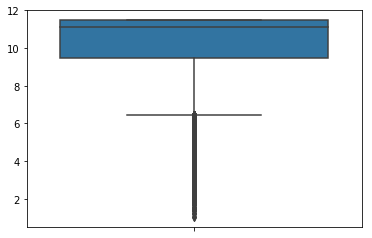

In [430]:
import seaborn as sns
 
# Make boxplot for one group only
sns.boxplot( y=tf_vectorizer.idf_ )


In [431]:
idfs.mean()

10.169920841638563

In [432]:
np.percentile(idfs, 25)

9.492859514400784

In [433]:
np.percentile(idfs, 75)

11.50776253494305

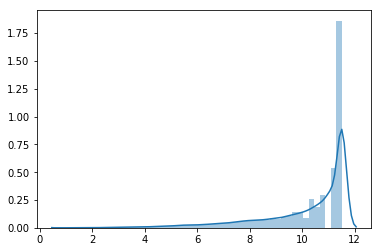

In [434]:
sns.distplot(tf_vectorizer.idf_)

We will filter out words based on idf values between IQR range

In [0]:
words=list(tf_vectorizer.vocabulary_.keys())
indexes=list(tf_vectorizer.vocabulary_.values())

In [0]:
values=dict(zip(indexes,words))


In [0]:

filtered_words=[]
for index,word in values.items():
  
  if (idfs[index]<=11.50 and idfs[index]>=9.49):
      filtered_words.append(word)
    

In [438]:
print("Number of words before filteringL",len(words))
print("Number of words after filtering:",len(filtered_words))

Number of words before filteringL 48242
Number of words after filtering: 17420


**EMBEDDING FILTERED WORDS**

In [0]:
embedding_matrix = np.zeros((48242,300))
for word, i in encodings_essay[0].word_index.items():
     if word in filtered_words:
            embedding_vector = glove.get(word)
            if embedding_vector is not None:
                  embedding_matrix[i] = embedding_vector

In [0]:
embedding_layer_essay = Embedding(input_dim=embedding_matrix.shape[0],
                            output_dim=embedding_matrix.shape[1], 
                            input_length=200,
                            weights=[embedding_matrix], 
                            trainable=False, 
                            name='embedding_layer_essay')

In [0]:
filepath="weights_model_2.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_auroc', verbose=0, save_best_only=True, mode='max')

In [442]:

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy',auroc])
model.fit([encodings_state[1],encodings_prefix[1],encodings_grade[1],padded_docs_categories,padded_docs_subcategories,padded_docs_essay,stacked_numbers], [y_train_cv],
          epochs=10, batch_size=256,validation_data=(cv_data,y_test_cv),callbacks=[tensorboard,checkpoint])

Train on 58556 samples, validate on 14640 samples
Epoch 1/10
58556/58556 [==============================] - 73s 1ms/step - loss: 0.4296 - acc: 0.8440 - auroc: 0.6501 - val_loss: 0.4415 - val_acc: 0.8522 - val_auroc: 0.7257
Epoch 2/10
58556/58556 [==============================] - 71s 1ms/step - loss: 0.3889 - acc: 0.8471 - auroc: 0.7296 - val_loss: 0.4402 - val_acc: 0.8522 - val_auroc: 0.7412
Epoch 3/10
58556/58556 [==============================] - 72s 1ms/step - loss: 0.3764 - acc: 0.8471 - auroc: 0.7557 - val_loss: 0.4183 - val_acc: 0.8522 - val_auroc: 0.7515
Epoch 4/10
58556/58556 [==============================] - 71s 1ms/step - loss: 0.3681 - acc: 0.8471 - auroc: 0.7708 - val_loss: 0.4256 - val_acc: 0.8522 - val_auroc: 0.7452
Epoch 5/10
58556/58556 [==============================] - 71s 1ms/step - loss: 0.3537 - acc: 0.8471 - auroc: 0.7956 - val_loss: 0.4059 - val_acc: 0.8522 - val_auroc: 0.7525
Epoch 6/10
58556/58556 [==============================] - 71s 1ms/step - loss: 0.3359

In [0]:
model.load_weights("weights_model_2.best.hdf5")

In [445]:
score = model.evaluate([encodings_state_test,encodings_prefix_test,encodings_grade_test,padded_docs_categories_test,padded_docs_subcategories_test,padded_docs_essay_test,stacked_number_test],[y_test],batch_size=1000)

36052/36052 [==============================] - 5s 134us/step


In [446]:
score

[0.40788347899589744, 0.8494674376717659, 0.7511885903863619]

We get an **AUC score of 0.75**

![alt text](https://drive.google.com/uc?id=1_45qx3WK9eKV-nHniQf8pyvYe8S3sIDx)

![alt text](https://drive.google.com/uc?id=1Qhxjqul909OoTiKJxOUQ-HcTkibwhKTi)

# **MODEL-3**

**ONE-HOT ENCODING SCHOOL_STATE**

```



In [657]:
train_x.school_state.nunique()

51

In [658]:
from keras.utils import to_categorical

onehot_state = to_categorical(encodings_state[1])
print('Shape of data (AFTER  encode): %s\n' % str(onehot_state.shape))

Shape of data (AFTER  encode): (58556, 52)



In [659]:
onehot_state_test = to_categorical(encodings_state_test)
print('Shape of data (AFTER  encode): %s\n' % str(onehot_state_test.shape))

Shape of data (AFTER  encode): (36052, 52)



In [0]:
onehot_state_test_cv = to_categorical(encodings_state_test_cv)

**ONE_HOT ENCODING teacher_prefix**

In [661]:
from keras.utils import to_categorical
onehot_prefix= to_categorical(encodings_prefix[1])
print('Shape of data (AFTER  encode): %s\n' % str(onehot_prefix.shape))

Shape of data (AFTER  encode): (58556, 6)



In [662]:
onehot_prefix_test= to_categorical(encodings_prefix_test)
print('Shape of data (AFTER  encode): %s\n' % str(onehot_prefix_test.shape))

Shape of data (AFTER  encode): (36052, 6)



In [0]:
onehot_prefix_test_cv= to_categorical(encodings_prefix_test_cv)

**ONE_HOT ENCODING project_grade_category**

In [664]:
from keras.utils import to_categorical
onehot_grade= to_categorical(encodings_grade[1])
print('Shape of data (AFTER  encode): %s\n' % str(onehot_grade.shape))

Shape of data (AFTER  encode): (58556, 5)



In [665]:
onehot_grade_test= to_categorical(encodings_grade_test)
print('Shape of data (AFTER  encode): %s\n' % str(onehot_grade_test.shape))

Shape of data (AFTER  encode): (36052, 5)



In [0]:
onehot_grade_test_cv= to_categorical(encodings_grade_test_cv)

**ONE_HOT ENCODING clean_categories**


In [0]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer_categories=CountVectorizer()
onehot_categories=vectorizer_categories.fit_transform(train_x_cv.clean_categories).toarray()


In [668]:
onehot_categories.shape

(58556, 9)

In [0]:
onehot_categories_test=vectorizer_categories.transform(test_x.clean_categories).toarray()

In [0]:
onehot_categories_test_cv=vectorizer_categories.transform(test_x_cv.clean_categories).toarray()

**ONE_HOT ENCODING clean_subcategories**

In [0]:

vectorizer_subcategories=CountVectorizer()

onehot_subcategories=vectorizer_subcategories.fit_transform(train_x_cv.clean_subcategories).toarray()

onehot_subcategories_test=vectorizer_subcategories.transform(test_x.clean_subcategories).toarray()

onehot_subcategories_test_cv=vectorizer_subcategories.transform(test_x_cv.clean_subcategories).toarray()

MERGING DATA OTHER THAN ESSAY

In [0]:
other_data=np.hstack((onehot_state,onehot_prefix,onehot_grade,onehot_categories,onehot_subcategories,stacked_numbers))
other_data_test=np.hstack((onehot_state_test,onehot_prefix_test,onehot_grade_test,onehot_categories_test,onehot_subcategories_test,stacked_number_test))
other_data_test_cv=np.hstack((onehot_state_test_cv,onehot_prefix_test_cv,onehot_grade_test_cv,onehot_categories_test_cv,onehot_subcategories_test_cv,stacked_number_test_cv))



In [0]:
other_data=np.expand_dims(other_data,axis=2)
other_data_test=np.expand_dims(other_data_test,axis=2)
other_data_test_cv=np.expand_dims(other_data_test_cv,axis=2)

**MODEL BUILDING**

In [0]:
from keras.layers import Conv1D

In [0]:
input_other = Input(shape=(other_data.shape[1],1),name='model_3_input')
conv1d_1=Conv1D(filters=64, kernel_size=(5),activation='relu',name='conv1d_1')(input_other)
conv1d_2=Conv1D(filters=32, kernel_size=(3),activation='relu',name='conv1d_2')(conv1d_1)
flatten_other = Flatten()(conv1d_2)



In [0]:
merged_data_2=concatenate([flat_lstm,flatten_other])

In [677]:
d1_1=Dense(126, activation='relu',kernel_initializer='glorot_uniform')(merged_data_2)
dropout1_1=Dropout(0.4)(d1_1)
d2_1=Dense(64,activation='relu',kernel_initializer='glorot_uniform')(dropout1_1)
dropout2_1=Dropout(0.4)(d2_1)
d3_1=d2=Dense(32,activation='relu',kernel_initializer='glorot_uniform')(dropout2_1)
output=Dense(1, activation='sigmoid')(d3_1)

model_1 = Model(inputs=[input_essay,input_other], outputs=output)
# summarize layers
print(model.summary())
# plot graph
plot_model(model_1, to_file='multiple_inputs_2.png')

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
essay (InputLayer)              (None, 200)          0                                            
__________________________________________________________________________________________________
school_state (InputLayer)       (None, 1)            0                                            
__________________________________________________________________________________________________
teacher_prefix (InputLayer)     (None, 1)            0                                            
__________________________________________________________________________________________________
project_grade_category (InputLa (None, 1)            0                                            
__________________________________________________________________________________________________
clean_cate

In [0]:
filepath="weights_model_3.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_auroc', verbose=0, save_best_only=True, mode='max')
tensorboard = TensorBoard(log_dir='logs/{}'.format(time()))

In [679]:
model_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy',auroc])
model_1.fit([padded_docs_essay,other_data],[y_train_cv],
          epochs=10, batch_size=256,validation_data=([padded_docs_essay_test_cv,other_data_test_cv],y_test_cv),callbacks=[tensorboard,checkpoint])

Train on 58556 samples, validate on 14640 samples
Epoch 1/10
58556/58556 [==============================] - 76s 1ms/step - loss: 0.4194 - acc: 0.8460 - auroc: 0.6664 - val_loss: 0.4038 - val_acc: 0.8522 - val_auroc: 0.7307
Epoch 2/10
58556/58556 [==============================] - 74s 1ms/step - loss: 0.3794 - acc: 0.8474 - auroc: 0.7451 - val_loss: 0.3858 - val_acc: 0.8548 - val_auroc: 0.7497
Epoch 3/10
58556/58556 [==============================] - 74s 1ms/step - loss: 0.3619 - acc: 0.8528 - auroc: 0.7774 - val_loss: 0.3952 - val_acc: 0.8511 - val_auroc: 0.7527
Epoch 4/10
58556/58556 [==============================] - 74s 1ms/step - loss: 0.3341 - acc: 0.8633 - auroc: 0.8203 - val_loss: 0.3803 - val_acc: 0.8481 - val_auroc: 0.7357
Epoch 5/10
58556/58556 [==============================] - 73s 1ms/step - loss: 0.2863 - acc: 0.8841 - auroc: 0.8786 - val_loss: 0.3998 - val_acc: 0.8460 - val_auroc: 0.7083
Epoch 6/10
58556/58556 [==============================] - 73s 1ms/step - loss: 0.2169

In [0]:
model_1.load_weights("weights_model_3.best.hdf5")

In [685]:
score = model_1.evaluate([padded_docs_essay_test,other_data_test],[y_test],batch_size=1000)

36052/36052 [==============================] - 5s 139us/step


In [686]:
score

[0.39704185264642, 0.8512981286604926, 0.7464885478407257]

**We got an AUC OF 0.74**

**PLOT**

![alt text](https://drive.google.com/uc?id=19zazcJ3v7aBaEKAWnwBeoN-INYF_kic_)

![alt text](https://drive.google.com/uc?id=1m3q78AkMoXOBedoTsjJRdZ7aSaj3CbbT)

# **CONCLUSION**

In [687]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Model", "Loss", "Accuracy", "AUC"]

x.add_row(["Model-1", 0.40454659601976245, 0.8494674376717659, 0.7524005067638703])
x.add_row(["Model-2", 0.40788347899589744, 0.8494674376717659, 0.7511885903863619])
x.add_row(["Model-3", 0.39704185264642, 0.8512981286604926, 0.7464885478407257])
print(x)

+---------+---------------------+--------------------+--------------------+
|  Model  |         Loss        |      Accuracy      |        AUC         |
+---------+---------------------+--------------------+--------------------+
| Model-1 | 0.40454659601976245 | 0.8494674376717659 | 0.7524005067638703 |
| Model-2 | 0.40788347899589744 | 0.8494674376717659 | 0.7511885903863619 |
| Model-3 |   0.39704185264642  | 0.8512981286604926 | 0.7464885478407257 |
+---------+---------------------+--------------------+--------------------+
